# 로그 연습
자전거 대여 수요 예측을 해보고 로그처리 후 값을 비교해보자

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
bike_df = pd.read_csv('data/bike_train.csv')

In [3]:
bike_df.info

<bound method DataFrame.info of                   datetime  season  holiday  workingday  weather   temp  \
0      2011-01-01 00:00:00       1        0           0        1   9.84   
1      2011-01-01 01:00:00       1        0           0        1   9.02   
2      2011-01-01 02:00:00       1        0           0        1   9.02   
3      2011-01-01 03:00:00       1        0           0        1   9.84   
4      2011-01-01 04:00:00       1        0           0        1   9.84   
...                    ...     ...      ...         ...      ...    ...   
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
0  

In [4]:
bike_df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [5]:
bike_df.sample(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
2768,2011-07-04 06:00:00,3,1,0,1,26.24,28.790,89,11.0014,5,11,16
481,2011-02-03 03:00:00,1,0,1,1,7.38,8.335,43,16.9979,0,1,1


In [6]:
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)

In [7]:
bike_df['year'] = bike_df.datetime.apply(lambda x:x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x:x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x:x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x:x.hour)

In [8]:
bike_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22


In [9]:
bike_df.drop(columns=['datetime','casual','registered'],inplace=True)
bike_df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0000,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0000,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0000,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0000,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0000,1,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,336,2012,12,19,19
10882,4,0,1,1,14.76,17.425,57,15.0013,241,2012,12,19,20
10883,4,0,1,1,13.94,15.910,61,15.0013,168,2012,12,19,21
10884,4,0,1,1,13.94,17.425,61,6.0032,129,2012,12,19,22


In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# log 값 변환시 NaN 등의 이슈로 log()가 아닌 log1p()를 이용해 RMSLE 계산
def rmsle(y,pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y-log_pred)**2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

# sklearn mean-squared-error를 이용해 rmse 계산
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

def evaluate_regr(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    # MAE는 사이킷런의 mean_absolute_error()로 계산
    mae_val = mean_absolute_error(y,pred)
    print('RMSLE : {0:.3f}, RMSE : {1:.3f}, MAE : {2:.3f}'.format(rmsle_val,rmse_val,mae_val))

In [11]:
np.expm1(np.log1p(23))

23.000000000000004

In [12]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [13]:
# data set
y = bike_df['count']
X = bike_df.drop(columns=['count'])
# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)


# model instance
lr_reg = LinearRegression()
ridge_reg = Ridge()
lasso_reg = Lasso()

# fitting and evaluate
lr_reg.fit(X_train,y_train)
ridge_reg.fit(X_train,y_train)
lasso_reg.fit(X_train,y_train)

lr_pred = lr_reg.predict(X_test)
ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)

evaluate_regr(y_test,lr_pred),evaluate_regr(y_test,ridge_pred),evaluate_regr(y_test,lasso_pred)


RMSLE : 1.165, RMSE : 140.900, MAE : 105.924
RMSLE : 1.165, RMSE : 140.900, MAE : 105.923
RMSLE : 1.163, RMSE : 140.917, MAE : 105.565


(None, None, None)

In [14]:
# 최상위 에러를 발생시킨 데이터 포인트 찾기
def get_top_error_data(y_test,pred,n_tops=5):
    result_df = pd.DataFrame(y_test.values, columns=['real_count'])
    result_df['predicted_count'] = np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count']-result_df['predicted_count'])
    print(result_df.sort_values('diff',ascending=False)[:n_tops])

In [15]:
get_top_error_data(y_test,lr_pred)

      real_count  predicted_count   diff
1618         890            322.0  568.0
3151         798            241.0  557.0
966          884            327.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0


## y값을 로그처리 한후 분포 확인
y값이 정규분포를 따르지 않는다면 로그처리를 해보는 것도 좋다</br>
정규 분포를 따르지 않더라도 로그처리를 하게되면 정규분포에 조금은 가까워지는 경향이 있기 때문이다.</br>
당연 성능을 평가하기 전에는 expm1()함수로 원래 스케일로 복원시켜야 한다.

<AxesSubplot:>

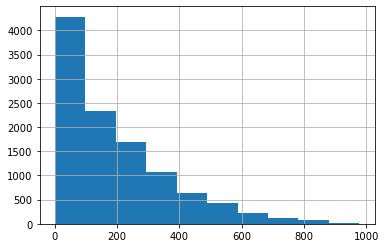

In [16]:
y.hist()

<AxesSubplot:>

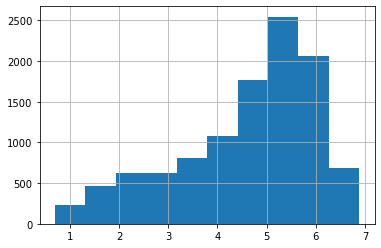

In [17]:
y_log = np.log1p(y)
y_log.hist()

In [18]:
"""
로그 처리한 y데이터를 통해서 예측을 해보자
"""

y_log = np.log1p(y)
# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y_log,test_size=0.3,random_state=0)


# model instance
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

# fitting and evaluate
lr_reg.fit(X_train,y_train)
ridge_reg.fit(X_train,y_train)
lasso_reg.fit(X_train,y_train)

lr_pred = lr_reg.predict(X_test)
ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)

lr_pred = np.expm1(lr_pred)
ridge_pred = np.expm1(ridge_pred)
lasso_pred = np.expm1(lasso_pred)

print('lr_model')
evaluate_regr(y_test,lr_pred)
print('ridge_model')
evaluate_regr(y_test,ridge_pred)
print('lasso_model')
evaluate_regr(y_test,lasso_pred)

lr_model
RMSLE : 3.031, RMSE : 205.689, MAE : 149.596
ridge_model
RMSLE : 3.031, RMSE : 205.585, MAE : 149.552
lasso_model
RMSLE : 3.029, RMSE : 203.664, MAE : 148.680


<AxesSubplot:>

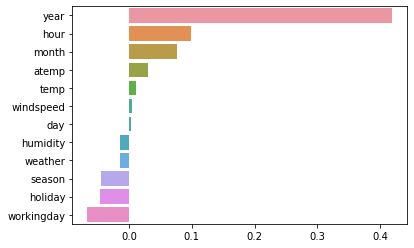

In [19]:
coef = pd.Series(lr_reg.coef_,index=X.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [20]:
# 'year', month', 'day', hour'등의 피처들을 One Hot Encoding
X_features_ohe = pd.get_dummies(X, columns=['year', 'month','day', 'hour', 'holiday',
                                              'workingday','season','weather'])



In [21]:
X_features_ohe.head(2)

,temp,atemp,humidity,windspeed,year_2011,year_2012,month_1,month_2,month_3,month_4,...,workingday_0,workingday_1,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,9.84,14.395,81,0.0,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
1,9.02,13.635,80,0.0,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0


In [22]:
# 원핫인코딩된 데이터를 활용하여 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe,y_log, test_size=0.3, random_state=0)

In [23]:
def get_model_predict(model,X_train,y_train,X_test,y_test,is_expm1=False):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    if is_expm1:
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('####{0}####'.format(model.__class__.__name__))
    evaluate_regr(y_test,pred)

In [24]:
# model instance
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

In [25]:
for model in [lr_reg,ridge_reg,lasso_reg]:
    get_model_predict(model,X_train,y_train,X_test,y_test,is_expm1=True)

####LinearRegression####
RMSLE : 0.590, RMSE : 97.687, MAE : 63.381
####Ridge####
RMSLE : 0.590, RMSE : 98.529, MAE : 63.893
####Lasso####
RMSLE : 0.635, RMSE : 113.219, MAE : 72.803


<AxesSubplot:>

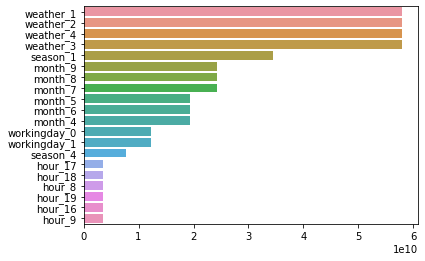

In [26]:
coef = pd.Series(lr_reg.coef_,X_features_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values, y=coef_sort.index)

## 분류기로 회귀 모델 생성하고 성능평가해보기
사이킷런에서 제공하는 분류기들은 대부분 회귀도 가능하도록 설게되었다.</br>
회귀모델을 생성하고 성능을 평가해보자

In [27]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [28]:
rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

for model in [rf_reg,gbm_reg,xgb_reg,lgbm_reg]:
    get_model_predict(model,X_train,y_train,X_test,y_test,is_expm1=True)

####RandomForestRegressor####
RMSLE : 0.355, RMSE : 50.439, MAE : 31.207
####GradientBoostingRegressor####
RMSLE : 0.330, RMSE : 53.342, MAE : 32.744
####XGBRegressor####
RMSLE : 0.342, RMSE : 51.732, MAE : 31.251
####LGBMRegressor####
RMSLE : 0.319, RMSE : 47.215, MAE : 29.029
